**Tech Preamble**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
region = "Kuro_new_2"

**Load Data**

In [4]:
data_CESM = np.load(f"/home/hmelzer/work/esn/CESM/Data/ssh_{region}_5d.npy")
# data_CESM = np.load(f"/home/hmelzer/work/esn/CESM/Data/ssh_{region}_detrended.npy")
lon_CESM = np.load(f"/home/hmelzer/work/esn/CESM/Data/lon_{region}.npy")
lat_CESM = np.load(f"/home/hmelzer/work/esn/CESM/Data/lat_{region}.npy")

**Load ESN**

In [5]:
from CESM_predict import train_and_predict_2d
# from SWE_predict import train_and_predict_2d

**Run ESN on SWE Data**

In [6]:
def test_SWE(savedir):
    data = data_CESM
    lon = lon_CESM
    lat = lat_CESM
    unit = "SSH [m]"

    input_shape = (data_CESM.shape[1], data_CESM.shape[2])
    input_size  = input_shape[0] * input_shape[1]
    
    #Ntotal = 1241 #17 years (25-41) 3d - 2068
    # Ntrain = 657 #9 years (25-33) 3d -1095
    # Npred = 583 #8 years (34-41) 3d - 972
    # Ntrans = 146 #2 years (25-26) 3d - 243
    Ntrain = 511  # 7 years
    Npred = 729   # 10 years
    Ntrans = 146  # 2 years

    N = Npred+Ntrain+1

    k = 0.1
    
    specs = [
        {"type": "pixels", "size": (10, 10), "factor": k},
        {"type": "conv", "size": (10, 10), "kernel": "gauss",  "factor": k},
        {"type": "conv", "size": (10, 10), "kernel": "random",  "factor": k},
        {"type": "gradient", "factor": 1},
        {"type": "vorticity", "factor": 1},
        {"type": "dct", "size": (10, 10), "factor": k},
        {"type": "random_weights", "input_size": input_size, "hidden_size": 10000, "factor": 10}
    ]

    
    parameter_dict = dict(
        specs = specs,
        Npred  = Npred,
        Ntrain = Ntrain,
        Ntrans = Ntrans,
        spectral_radius = 0.94,
        neuron_connections = 100,
        n_PCs  = 350,
        sigma  =  (0,1,1),
        eps    =  1e-2,
        plot_prediction = True,
        dtype='float64',
        lstsq_method ='svd',
        lstsq_thresh = 1e-3,
        ST_method = 'DCT',
        cpus_to_use = 32,
        scale_min = -1,
        scale_max =  1,
        savedir = savedir,
        neuron_dist = 'normal',
        upper_sr_calc_dim=5000,
        save_condition = 'always',
        random_seed = np.random.seed(),
        
    )

    return train_and_predict_2d(data, lon, lat, unit, config=parameter_dict, **parameter_dict)

In [7]:
def test_SWE(savedir):
    data = data_CESM
    lon = lon_CESM
    lat = lat_CESM
    unit = "SSH [m]"

    input_shape = (data_CESM.shape[1], data_CESM.shape[2])
    input_size  = input_shape[0] * input_shape[1]
    
    #Ntotal = 1241 #17 years (25-41) 3d - 2068
    # Ntrain = 657 #9 years (25-33) 3d -1095
    # Npred = 583 #8 years (34-41) 3d - 972
    # Ntrans = 146 #2 years (25-26) 3d - 243
    Ntrain = 511  # 7 years
    Npred = 74 #729   # 10 years
    Ntrans = 146  # 2 years

    N = Npred+Ntrain+1

    k = 0.1
    
    specs = [
        {"type": "pixels", "size": (10, 10), "factor": k},
        {"type": "conv", "size": (10, 10), "kernel": "gauss",  "factor": k},
        {"type": "conv", "size": (10, 10), "kernel": "random",  "factor": k},
        {"type": "gradient", "factor": 0.001},
        {"type": "vorticity", "factor": 0.001},
        {"type": "dct", "size": (10, 10), "factor": k},
        {"type": "random_weights", "input_size": input_size, "hidden_size": 10000, "factor": 10}
    ]

    
    parameter_dict = dict(
        specs = specs,
        Npred  = Npred,
        Ntrain = Ntrain,
        Ntrans = Ntrans,
        spectral_radius = 0.94,
        neuron_connections = 100,
        n_PCs  = 350,
        sigma  =  (0,1,1),
        eps    =  1e-2,
        plot_prediction = True,
        dtype='float64',
        lstsq_method ='svd',
        lstsq_thresh = 1e-3,
        ST_method = 'DCT',
        cpus_to_use = 32,
        scale_min = -1,
        scale_max =  1,
        savedir = savedir,
        neuron_dist = 'normal',
        upper_sr_calc_dim=5000,
        save_condition = 'always',
        random_seed = np.random.seed(),
        
    )

    return train_and_predict_2d(data, lon, lat, unit, config=parameter_dict, **parameter_dict)

Image shape is (256, 512)
Data is taking up 0.7GB. Deleting after splitting.
Starting pre-processing...


Finished pre-processing!
Starting Building Dyn. Sys. ...
Input size (1 slice): (256, 512)
Hidden size: 665560
Building Whh took 16.57s
Starting transient Evolution of dyn. sys. ...
Transient evolution of dynamical system (146 steps) took 20.17s
Starting harvest of echo states ...
State harvesting of 365 echo states took 51.34s
Starting PCA dim. reduction ...
PCA Dimension reduction of H took: 21.44s
Starting to create Readout Matrix using lstsq
Least Squares optimization took 0.38s
Training error: 3.124827025818808e-06
Starting Prediction ...
Predicting for 74 time steps took 14.80s
Starting post-processing ...
MSE-IMED: MSE in standardizing-transform-space: 8.62e-03
MSE after rescaling,iST of preds and targets: 4.17e+01
MSE after rescaling,iST of preds wrt. untouched targets: 4.17e+01
Total time: 159.8s
mse is 41.694859814113144
Always saving model
Saving at Kuro_new_2/esn014
y0
h0
Whh
bh
Who
predictions
targets
pred_error
time_int_spat_error
Saving plots/animation in Kuro_new_2/esn01

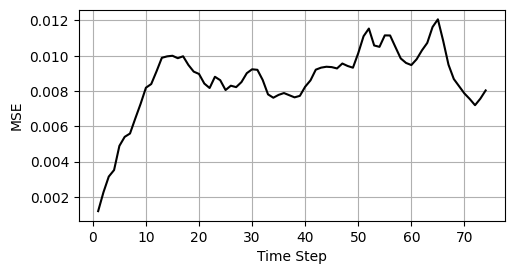

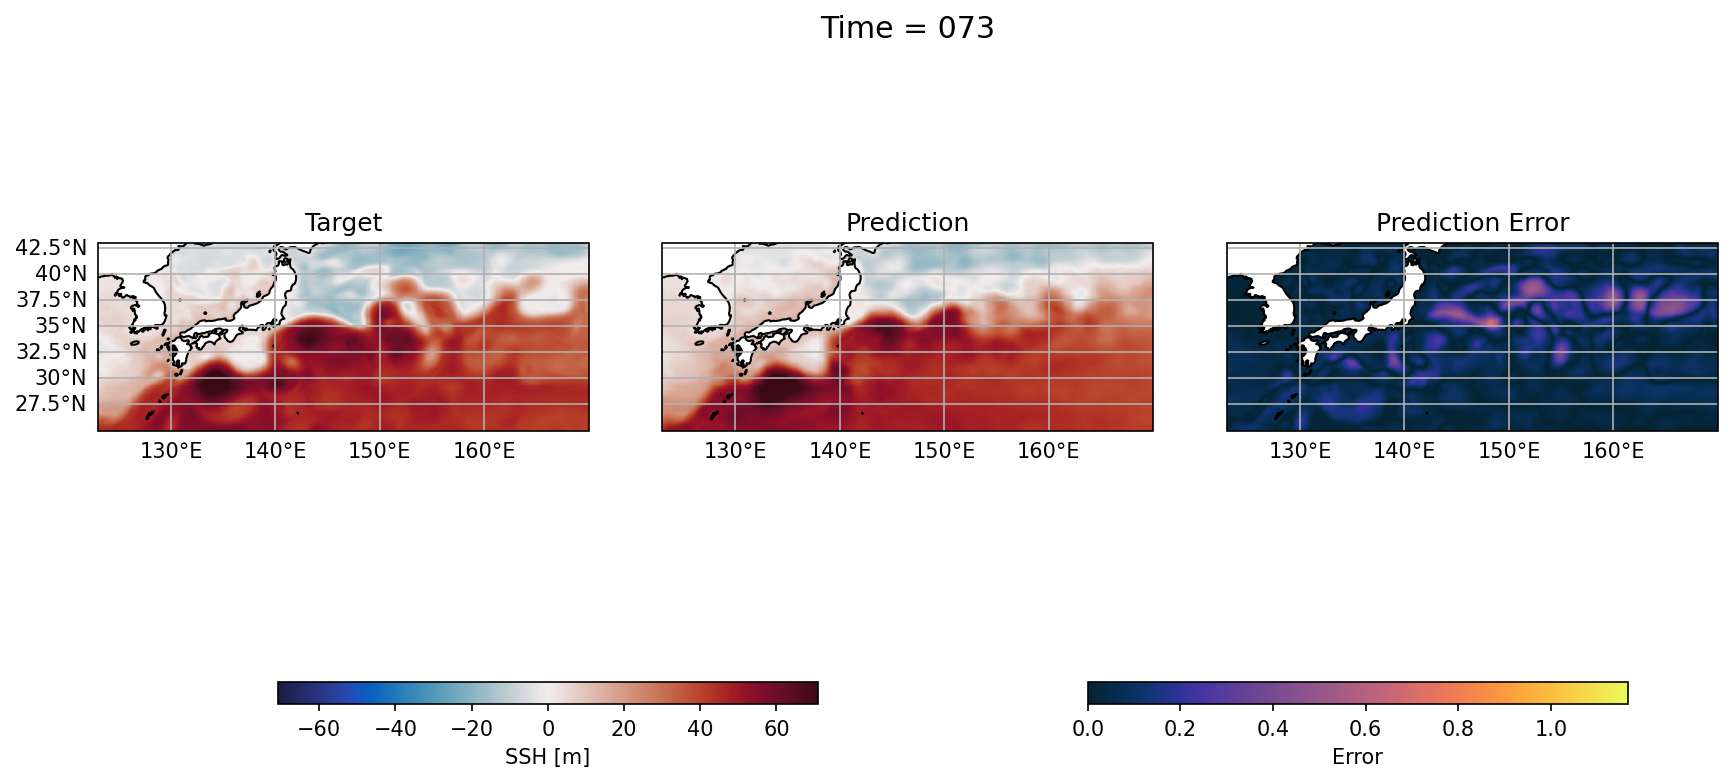

In [8]:
mse = test_SWE(region)